# EDA Visualized

## Import relevant libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read dataset as pandas dataframe

In [30]:
df = pd.read_csv('datathon_propattributes.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,3,4,9,10,11,17,19,20,34,45,46,47,48,50,51,52,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## View what the data looks like

In [33]:
print(df.head(50))
print(df.shape)

    fips_cd                apn  IsTraining prop_house_number  \
0     42001  09 E12-0054---000           1               190   
1     42001  09 E12-0054---000           1               190   
2     42001  09 E12-0054---000           1               190   
3     42001  09 E12-0054---000           1               190   
4     42001  08 008-0271---000           1               112   
5     42001  08 031-0092---000           1                50   
6     42001  09 E12-0055---000           1               180   
7     42001  08 021-0017---000           1                25   
8     42001  08 008-0272---000           1               114   
9     42001  09 E12-0057---000           0               160   
10    42001  09 E12-0057---000           0               160   
11    42001  08 021-0020---000           1                10   
12    42001  08 021-0021---000           0                 5   
13    42001  08 021-0022A--000           1                61   
14    42001  09 E12-0063---000          

## Select some variables to explore and visualize

Single Family Residential                                 2725339
Condominium (Residential)                                  449921
Row house (Residential)                                    265099
Residential-Vacant Land                                    160398
Duplex (2 units, any combination)                          149246
Triplex (3 units, any combination)                          57597
Townhouse (Residential)                                     53960
Apartments (generic)                                        47786
Residential (General) (Single)                              42717
Vacant Land (General)                                       40361
Commercial/Office/Residential Mixed Use                     33737
Mobile home                                                 28028
Multi-Family Dwellings (Generic, 2+)                        24179
Commercial (General)                                        22865
Rural Residence (Agricultural)                              22348
Unusable L

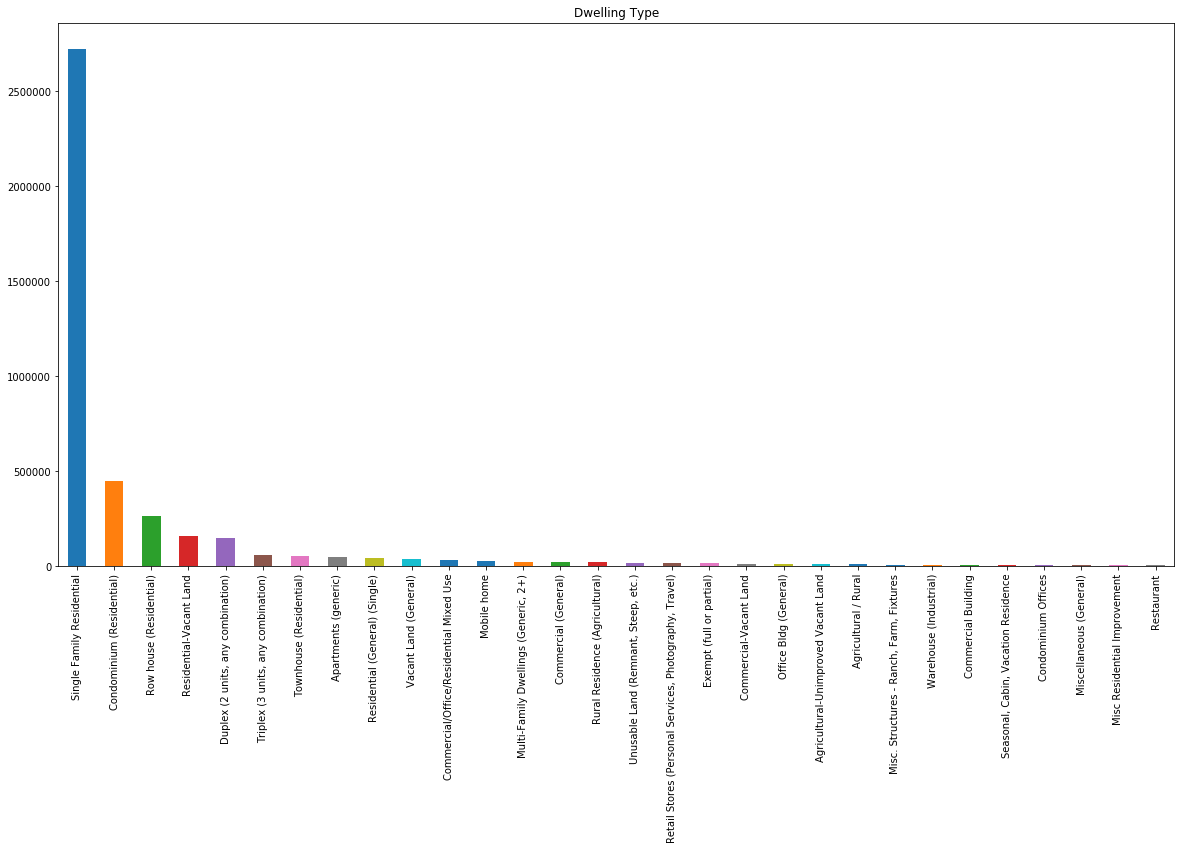

In [48]:
def filterByType(dwelling_type):
    if value_counts[dwelling_type] > 6000:
        return True
    else:
        return False
df.dropna(subset=['dwelling_type'], how='any', inplace=True)
df['no_drop'] = df['dwelling_type'].apply(filterByType)
df = df.loc[df['no_drop'] == True]
dwelling_type_dropped = df.dwelling_type.value_counts()
print(dwelling_type_dropped)
dwelling_type_dropped.plot(kind='bar', figsize=(20,10))
plt.title('Dwelling Type')
plt.show()

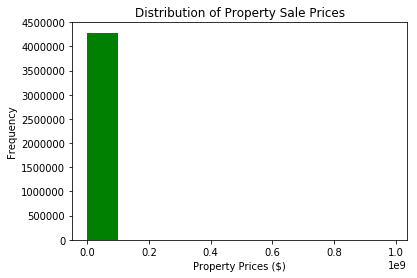

In [51]:
#Distribution of Property Sale Prices
plt.hist(df.sale_amt, facecolor = 'green')
plt.xlabel('Property Prices ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Sale Prices')
plt.show()

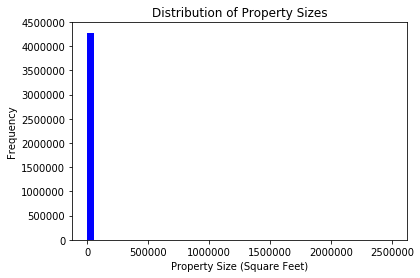

In [53]:
#Distribution of Property Square Feet
plt.hist(df.building_square_feet, 50, facecolor = 'blue')
plt.xlabel('Property Size (Square Feet)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Sizes')
plt.show()

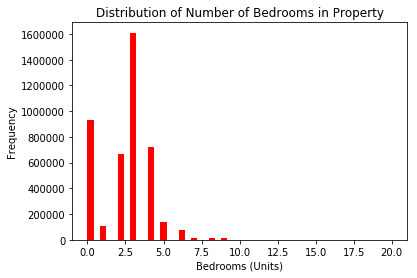

In [55]:
#Distribution of Number of Bedrooms in Property
plt.hist(df.bedrooms, 50, facecolor = 'red')
plt.xlabel('Bedrooms (Units)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bedrooms in Property')
plt.show()

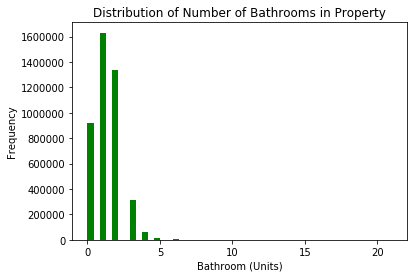

In [56]:
#Distribution of Number of Bathrooms in Property
plt.hist(df.total_baths_calculated, 50, facecolor = 'green')
plt.xlabel('Bathroom (Units)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bathrooms in Property')
plt.show()

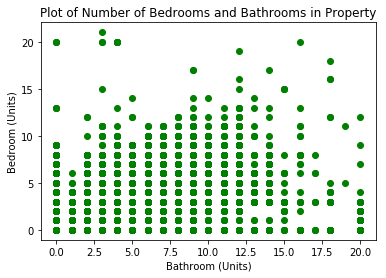

In [58]:
#Scatter Plot of Number of Bedrooms and Bathrooms in Property
plt.scatter(df.bedrooms,df.total_baths_calculated,facecolor = 'green')
plt.xlabel('Bathroom (Units)')
plt.ylabel('Bedroom (Units)')
plt.title('Plot of Number of Bedrooms and Bathrooms in Property')
plt.show()

True


In [11]:
print(df['style'].unique())
print(df['stories_cd'].unique())

[ True False]


                             dwelling_type  no_drop
4413162          Single Family Residential     True
4413163          Single Family Residential     True
4413164          Single Family Residential     True
4413165          Single Family Residential     True
4413166          Single Family Residential     True
4413167          Single Family Residential     True
4413168          Single Family Residential     True
4413169          Single Family Residential     True
4413170          Single Family Residential     True
4413171          Single Family Residential     True
4413172          Single Family Residential     True
4413173          Single Family Residential     True
4413174          Single Family Residential     True
4413175          Single Family Residential     True
4413176          Single Family Residential     True
4413177          Single Family Residential     True
4413178          Single Family Residential     True
4413179          Single Family Residential     True
4413180     

[ True]


Single Family Residential                                 2725339
Condominium (Residential)                                  449921
Row house (Residential)                                    265099
Residential-Vacant Land                                    160398
Duplex (2 units, any combination)                          149246
Triplex (3 units, any combination)                          57597
Townhouse (Residential)                                     53960
Apartments (generic)                                        47786
Residential (General) (Single)                              42717
Vacant Land (General)                                       40361
Commercial/Office/Residential Mixed Use                     33737
Mobile home                                                 28028
Multi-Family Dwellings (Generic, 2+)                        24179
Commercial (General)                                        22865
Rural Residence (Agricultural)                              22348
Unusable L

In [25]:
df.drop('style', axis=1, inplace=True)

In [26]:
df.shape

(4283795, 73)

In [29]:
slicedData = df.loc[df.IsTraining != 0]
slicedData.to_csv('training_data.csv')